<a href="https://colab.research.google.com/github/sciencebyAJ/OWRD_Training_20240927/blob/main/Example_4_OpenET_JuniperRemovalPairedWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
! git clone https://github.com/sciencebyAJ/OWRD_Training_20240927.git

fatal: destination path 'OWRD_Training_20240927' already exists and is not an empty directory.


In [57]:
import geopandas as gpd
import glob
import pandas as pd
import getpass
import requests

In [34]:
maysws_gdf = gpd.read_file('/content/OWRD_Training_20240927/Shapefiles/maysWS/maysWS.shp')
jensenws_gdf = gpd.read_file('/content/OWRD_Training_20240927/Shapefiles/jensenWS/jensenWS.shp')
maysws_gdf_gee = maysws_gdf.to_crs(epsg=4326)
jensenws_gdf_gee = jensenws_gdf.to_crs(epsg=4326)

In [35]:
coords = maysws_gdf_gee.geometry.get_coordinates()

Get a coodinate list from the polygon geometry to make an API call.

In [58]:
def get_coord_list(gdf):
  coords = gdf.geometry.get_coordinates()
  coord_list = coords.values.tolist()
  mylist_n = [j for i in coord_list for j in i]
  return mylist_n

In [53]:
YOUR_API_KEY = getpass.getpass('Paste API Key Here --> ')


************************************************************
*                                                          *
*        Input your OpenET API Key below:                  *
*                                                          *
************************************************************

Paste API Key: ··········


In [54]:
maysWS_coords = get_coord_list(maysws_gdf_gee)
jensensWS_coords = get_coord_list(jensenws_gdf_gee)


In [61]:

# set your API key before making the request
header = {"Authorization": YOUR_API_KEY}

# endpoint arguments
args = {
  "date_range": [
    "2010-01-01",
    "2023-12-31"
  ],
  "interval": "monthly",
  "geometry": maysWS_coords,
  "model": "ensemble",
  "variable": "ET",
  "reference_et": "gridMET",
  "reducer": "mean",
  "units": "mm",
  "file_format": "JSON"
}

# query the api
resp = requests.post(
    headers=header,
    json=args,
    url="https://openet-api.org/raster/timeseries/polygon"
)

Mays_df = pd.DataFrame.from_dict((resp.json()))

In [62]:

# set your API key before making the request
header = {"Authorization": YOUR_API_KEY}

# endpoint arguments
args = {
  "date_range": [
    "2010-01-01",
    "2023-12-31"
  ],
  "interval": "monthly",
  "geometry": jensensWS_coords,
  "model": "ensemble",
  "variable": "ET",
  "reference_et": "gridMET",
  "reducer": "mean",
  "units": "mm",
  "file_format": "JSON"
}

# query the api
resp = requests.post(
    headers=header,
    json=args,
    url="https://openet-api.org/raster/timeseries/polygon"
)

Jensen_df = pd.DataFrame.from_dict((resp.json()))

In [73]:
Jensen_df.rename(columns={'et':'jense_et_mm'})
Jensen_df['mays_et_mm'] = Mays_df['et']
Jensen_df['time']=pd.to_datetime(Jensen_df['time'])
Jensen_df.set_index('time',inplace=True)

,jense_et_mm,mays_et
time,,
2021-01-01,5.143,7.219
2021-02-01,11.726,12.369
2021-03-01,43.721,35.279
2021-04-01,65.811,49.393
2021-05-01,69.266,55.225
2021-06-01,66.507,56.353
2021-07-01,52.816,36.599
2021-08-01,57.245,39.275
2021-09-01,44.468,33.069


KeyError: 'time'

<Axes: xlabel='time'>

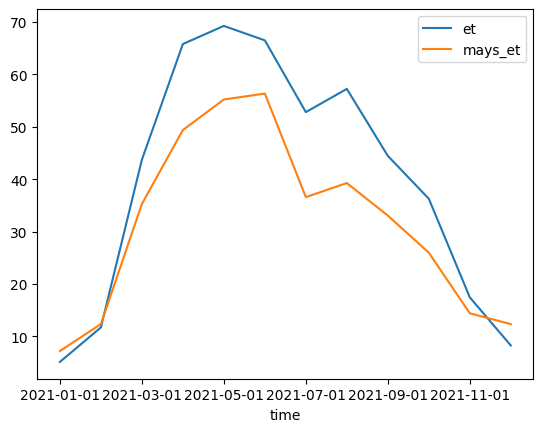

In [72]:
Jensen_df.plot()